Partie test du modele

bibliothèque :

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as img

import os

import cv2 as cv

#Partie Sklearn
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#Partie Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

Étape 1: Nettoyage des images

In [3]:
data=[]
label=[]
size=128
FlowerPath='../../flowers'        
os.listdir(FlowerPath)
for folder in os.listdir(FlowerPath):
    for file in os.listdir(os.path.join(FlowerPath,folder)):
        if file.endswith("jpeg"):
            label.append(folder)
            img = cv.imread(os.path.join(FlowerPath,folder, file))
            img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            im = cv.resize(img_rgb, (size,size))
            data.append(im)
            
        else: 
             continue

data_arr = np.array(data)
label_arr = np.array(label)
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,106)
X = data_arr/255




Étape 2 : Séparation des données, 20% dans le test et 80% dans l'entrainement

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Étape 3 : Création d'un générateur d'image

In [5]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

Étape 4 : Création d'un modele

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (size,size,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(size, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(106, activation = "softmax"))






Étape 5 : Premier entrainement

In [7]:

model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=30

checkpoint_path = "../modele/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),   
                              verbose = 1,
                              callbacks=[cp_callback])

C:\Users\Mathy\AppData\Local\Temp/ipykernel_26668/875621390.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


Epoch 1/30
319/319 [==============================] - ETA: 0s - loss: 2.5557 - accuracy: 0.3308
Epoch 00001: saving model to modele\cp.ckpt
319/319 [==============================] - 261s 815ms/step - loss: 2.5557 - accuracy: 0.3308 - val_loss: 2.4180 - val_accuracy: 0.3740
Epoch 2/30
319/319 [==============================] - ETA: 0s - loss: 2.5190 - accuracy: 0.3342
Epoch 00002: saving model to modele\cp.ckpt
319/319 [==============================] - 256s 801ms/step - loss: 2.5190 - accuracy: 0.3342 - val_loss: 2.3723 - val_accuracy: 0.3885
Epoch 3/30
319/319 [==============================] - ETA: 0s - loss: 2.4975 - accuracy: 0.3441
Epoch 00003: saving model to modele\cp.ckpt
319/319 [==============================] - 255s 799ms/step - loss: 2.4975 - accuracy: 0.3441 - val_loss: 2.3602 - val_accuracy: 0.3889
Epoch 4/30
319/319 [==============================] - ETA: 0s - loss: 2.4924 - accuracy: 0.3456
Epoch 00004: saving model to modele\cp.ckpt
319/319 [==========================

Étape 6 : Affichage des performance de  l'entrainement

Text(0.5, 1.0, 'Entrainement et Validation')

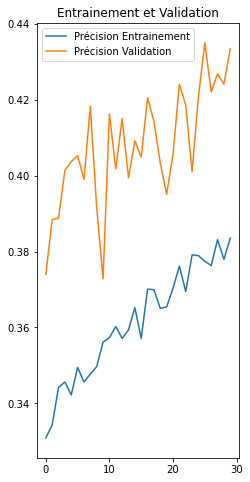

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Précision Entrainement')
plt.plot(epochs_range, val_acc, label='Précision Validation')
plt.legend()
plt.title('Entrainement et Validation')

Étape 7 : Sauvegarde du modele

In [9]:
model.save('../modele/my_model.h5')
del model